## Layer Explaination

In [6]:
import tensorflow as tf

### Input Image
input으로 들어갈 Dataset을 들어다보면서 시각화까지

패키지 로드
- os
- glob
- matplotlib

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from tensorflow.keras import datasets
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [9]:
image = train_x[0]

이미지를 열어봤으니 무엇을 확인 해볼까요?

In [10]:
image.shape #shape를 확인하기!

(28, 28)

차원 수를 확인 했는데 어떤 결과가 나왔나요?
- 이미지 데이터는 [batch_size, height, width, channel(1 or 3)]

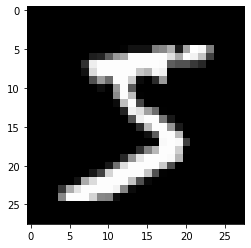

In [11]:
plt.imshow(image, 'gray')
plt.show()

In [12]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

### Feature Extraction

1. feature extraction (예측 전 특징/패턴을 뽑아내는 단계)
2. classification (예측)

### Convolution
- filters:layer에서 나갈 때 몇 개의 filter를 만들 것인지(a.k.a weights, filters, channels)
- kernel_size : filter(Weight)의 사이즈
- strides : 몇 개의 pixel을 skip하면서 훑어지나갈 것인지 (사이즈에도 영향을 줌)
- padding : zero padding을 만들 것인지. VALID는 Padding이 없고, SAME은 Padding이 있음(사이즈에도 영향을 줌)
- activation : Activation Function을 만들 것인지. 당장 설정 안해도 Layer층을 따로 만들 수 있음

In [13]:
tf.keras.layers.Conv2D(filters = 3, kernel_size=(3,3), strides = (1,1), padding='SAME', activation='relu')

In [14]:
tf.keras.layers.Conv2D(3,3,1,'SAME')

### Visualization

- tf.keras.layers.Conv2D

In [15]:
image = tf.cast(image,dtype=tf.float32)
image.dtype

tf.float32

In [16]:
layer = tf.keras.layers.Conv2D(5,3,1, padding='SAME')
layer

In [17]:
output = layer(image)

In [18]:
output
#filter개수만큼 channel수가 변하게 된다.

<tf.Tensor: shape=(1, 28, 28, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0

In [19]:
import numpy as np
np.min(image), np.max(image)

(0.0, 255.0)

In [20]:
np.min(output), np.max(output)

(-300.78964, 345.6511)

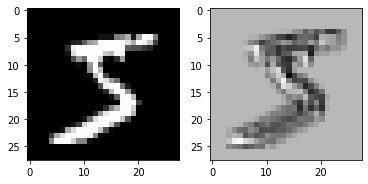

In [21]:
plt.subplot(1,2,1)
plt.imshow(image[0,:,:,0],'gray')
plt.subplot(1,2,2)
plt.imshow(output[0,:,:,0],'gray')
plt.show()

weight 불러오기
- layer.get_weights()

In [22]:
weight = layer.get_weights() #0:weight, 1:bias

In [23]:
weight[0].shape, weight[1].shape

((3, 3, 1, 5), (5,))

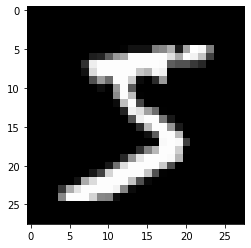

In [24]:
plt.imshow(image[0,:,:,0],'gray')

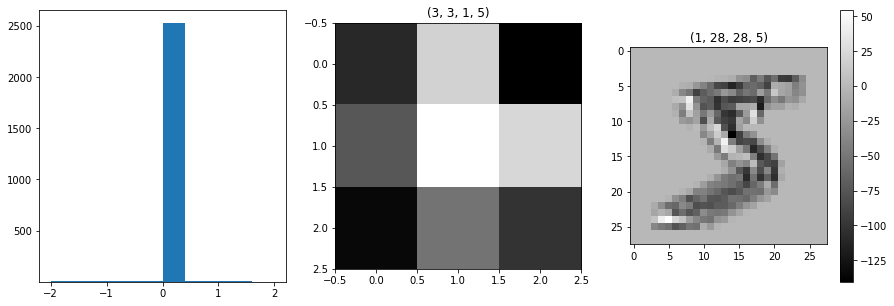

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range = [-2,2])
plt.ylim(0.100)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0],'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0,:,:,0],'gray')
plt.colorbar()
plt.show()

In [26]:
import numpy as np

In [27]:
np.min(output), np.max(output)

(-300.78964, 345.6511)

### Activation Function

In [28]:
tf.keras.layers.ReLU()

In [29]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [30]:
output.shape

TensorShape([1, 28, 28, 5])

In [31]:
np.min(act_output),np.max(act_output)

(0.0, 345.6511)

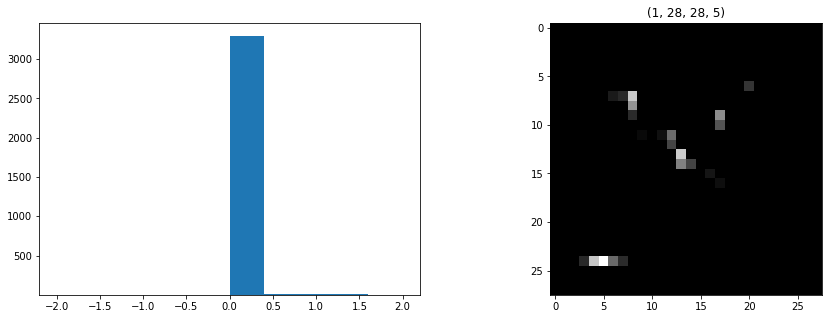

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(),range=[-2,2])
plt.ylim(0.100)
plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0,:,:,0], 'gray')
plt.show()

### Pooling
- tf.keras.layers.MaxPool2D

In [33]:
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')

In [34]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')
pool_output = pool_layer(act_output)

In [35]:
act_output.shape

TensorShape([1, 28, 28, 5])

In [36]:
pool_output.shape

TensorShape([1, 14, 14, 5])

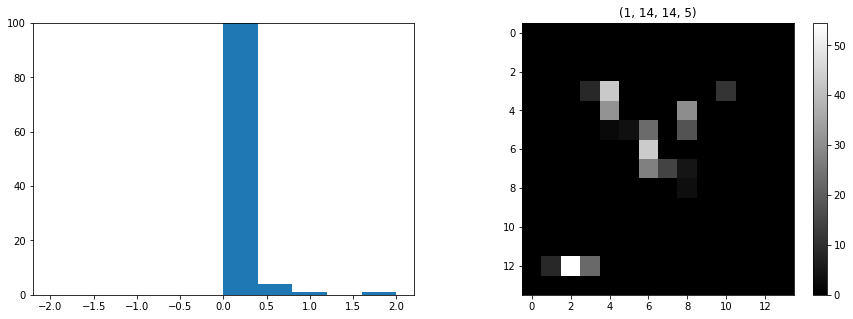

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

### Fully Connected

y = wx + b

### Flatten
-tf.keras.layers.Flatten()
- 펼치기

In [38]:
import tensorflow as tf

In [39]:
tf.keras.layers.Flatten()

In [40]:
layer = tf.keras.layers.Flatten()

In [41]:
flatten = layer(output)

In [43]:
output.shape

TensorShape([1, 28, 28, 5])

In [44]:
flatten.shape

TensorShape([1, 3920])

In [45]:
28*28*5 #사이즈는 유지하며 쭉 펼쳐짐
#1은 배치사이즈 

3920

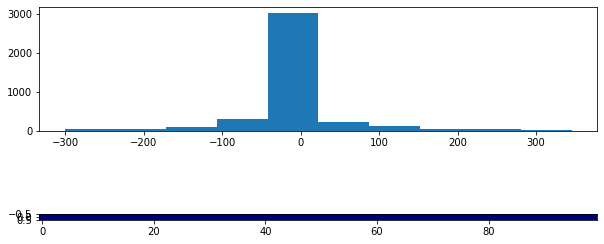

In [47]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.subplot(212)
plt.imshow(flatten[:,:100],'jet')
plt.show()

### Dense 
 -tf.keras.layers.Dense
 - 하나씩 연결하기

In [48]:
tf.keras.layers.Dense(32, activation='relu')

In [49]:
layer = tf.keras.layers.Dense(32, activation='relu')

In [50]:
output = layer(flatten)

In [52]:
output.shape # 3920->32

TensorShape([1, 32])

In [53]:
layer_2 = tf.keras.layers.Dense(10, activation='relu')
output_example = layer_2(output)

In [55]:
output_example.shape

TensorShape([1, 10])

### Dropout
-tf.keras.layers.Dropout
- 자동으로 학습할때마다 overfitting을 끊어줌,, 전체 노드를 골고루 학습이 되도록
- 학습할때만 실행됨

In [56]:
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)

In [57]:
output.shape

TensorShape([1, 32])

### Build Model

In [58]:
from tensorflow.keras import layers

In [59]:
input_shape = (28,28,1)
num_classes = 10

In [63]:
inputs = layers.Input(shape=input_shape)

# Feature Extraction
#convolution Block 1 
net = layers.Conv2D(32,3,padding='SAME')(inputs) #filter 개수, 사이즈
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,3,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0,25)(net)

#convolution Block 2
net = layers.Conv2D(64,3,padding='SAME')(net) #filter 개수, 사이즈
net = layers.Activation('relu')(net)
net = layers.Conv2D(64,3,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0,25)(net)

#Fully Connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0,25)(net)
net = layers.Dense(10)(net) #MNIST의 class가 10개이므로 마지막 node는 10으로 해줘야함
net = layers.Activation('softmax')(net) #모든 값의 합이 1이 되도록

model = tf.keras.Model(inputs=inputs, outputs= net, name='Basic_CNN')

In [64]:
model

In [65]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_12 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0 